# 단어 빈도 분석
* 단어 빈도 분석은 전체 문서 또는 문서별 단어 출현빈도를 보여준다. 
* 한글, 영어를 불문하고 불용어들은 사전에 제거한 후 단어 빈도를 분석해야 한다. 
* 단어 빈도는 단어구름(wordcloud) 형태로 많이 표현한다. 

In [2]:
import pandas as pd 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#### 파일 읽어오기 

In [3]:
f = open("./datas/트럼프_연설문.txt", 'r',  encoding='UTF8')
lines = f.readlines()[0]
f.close()

lines[0:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

#### 토큰 생성 준비 
* \\w+ : 임의의 워드 캐릭터(alphanumeric & underscore)

In [4]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
words = lines.lower()
tokens = tokenizer.tokenize(words)

# 불용어 제거 
stoped_tokens = [i for i in list((tokens)) if not i in stop_words]

# 길이가 1 이상인 단어들 추출 
stoped_tokens2 = [i for i in stoped_tokens if len(i) > 1]

#### pandas 시리즈 형태로 결과 출력 
* 단어 빈도수 순으로 상위 10개 출력 

In [5]:
pd.Series(stoped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
every        7
nation       7
back         6
world        6
new          6
dtype: int64

# 단어 구름

In [1]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [11]:
def __array__(self):   
    return self.to_array()

def to_array(self):    
    return np.array(self.to_image())

In [12]:
font_path = "/Utils/Fonts/NanumGothic.ttf"
wordcloud = WordCloud(
    font_path=font_path,
    width = 800, 
    height = 800, 
    background_color="white"
)

count = Counter(stoped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

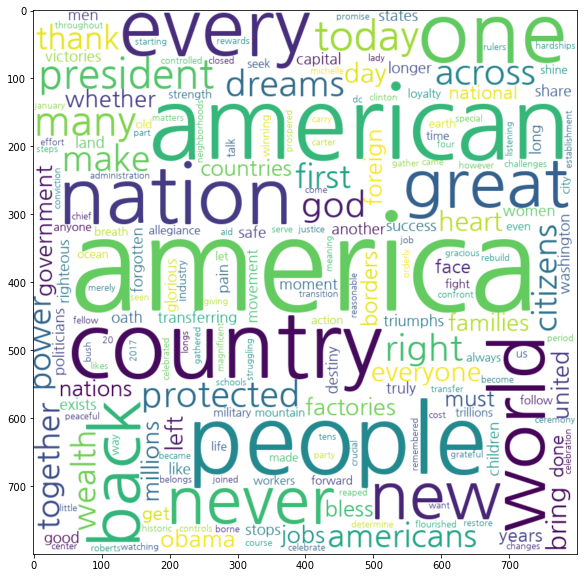

In [13]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_eng.png')

# 사진 형상 안에 단어 구름 넣기

In [15]:
from PIL import Image
import numpy as np

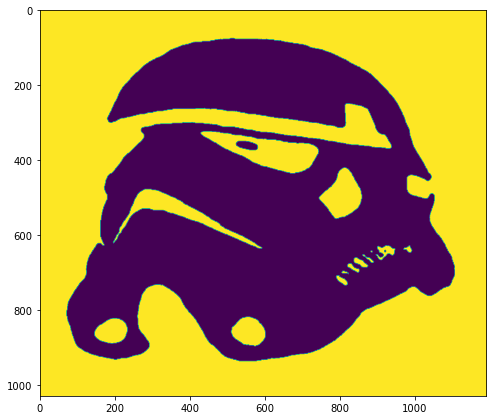

In [35]:
trump_mask = np.array(Image.open("../../Utils/Images/starwars_mask.png"))
plt.figure(figsize=(8,8))
plt.imshow(trump_mask, interpolation="bilinear")
plt.show()

In [36]:
count = Counter(stoped_tokens2)
wc_trump = WordCloud(
    font_path = font_path,
    mask = trump_mask,
    background_color="white"
)
wc_trump = wc_trump.generate_from_frequencies(count)

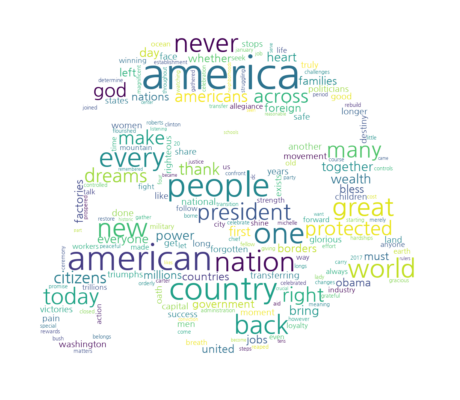

In [37]:
plt.figure(figsize=(8, 8))
plt.imshow(wc_trump, interpolation="bilinear")
plt.axis('off')
plt.show()